In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
import glob
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


/share/python-virtual-environments/daniel-jl/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%matplotlib notebook

In [25]:
window = 150
n_clusters = 15

In [26]:
df = pd.read_hdf(f"correct_frame_motifs_{window}_nclusters_15_meanvarnorm_rollingmean.hdf5", key = "data")

In [27]:
model = TimeSeriesKMeans.from_json(f"model_with_context_n15_w{window}.json")

In [28]:
motifs = TimeSeriesScalerMeanVariance().fit_transform(np.stack(df["motifs"]))

In [29]:
s = np.split(motifs, range(len(motifs)))

In [30]:
motifs.shape

(18776, 150, 7)

In [31]:
df["scaled"] = s[1:]

In [32]:
import tqdm

In [33]:
df["labels"] = model.labels_

In [34]:
df.shape

(18776, 7)

In [ ]:
fig, ax = plt.subplots(7,n_clusters, figsize = (10, 10), sharex = True, sharey = True)
for cluster in range(n_clusters):
    subset = df[df["labels"] == cluster]
    for i, s in tqdm.tqdm(subset.iterrows()):
        for j in range(7):
            ax[j, cluster].plot(s["scaled"][0,:,j], c = "gray", alpha = 0.008, lw  = 0.2)
    #             ax[j,cluster].axis("equal")
    center = model.cluster_centers_[cluster]
    for j in range(7):
        ax[j,cluster].plot(center[:,j], c = "r", lw = 1)
        if j == 0:
            ax[j, cluster].set_title(str(cluster))


In [ ]:
# fig.savefig(f"clustering_results_{window}_{n_clusters}_{model.metric}_withspeed.svg")

In [ ]:
np.max(subset_motifs, axis = 0).shape

<IPython.core.display.Javascript object>


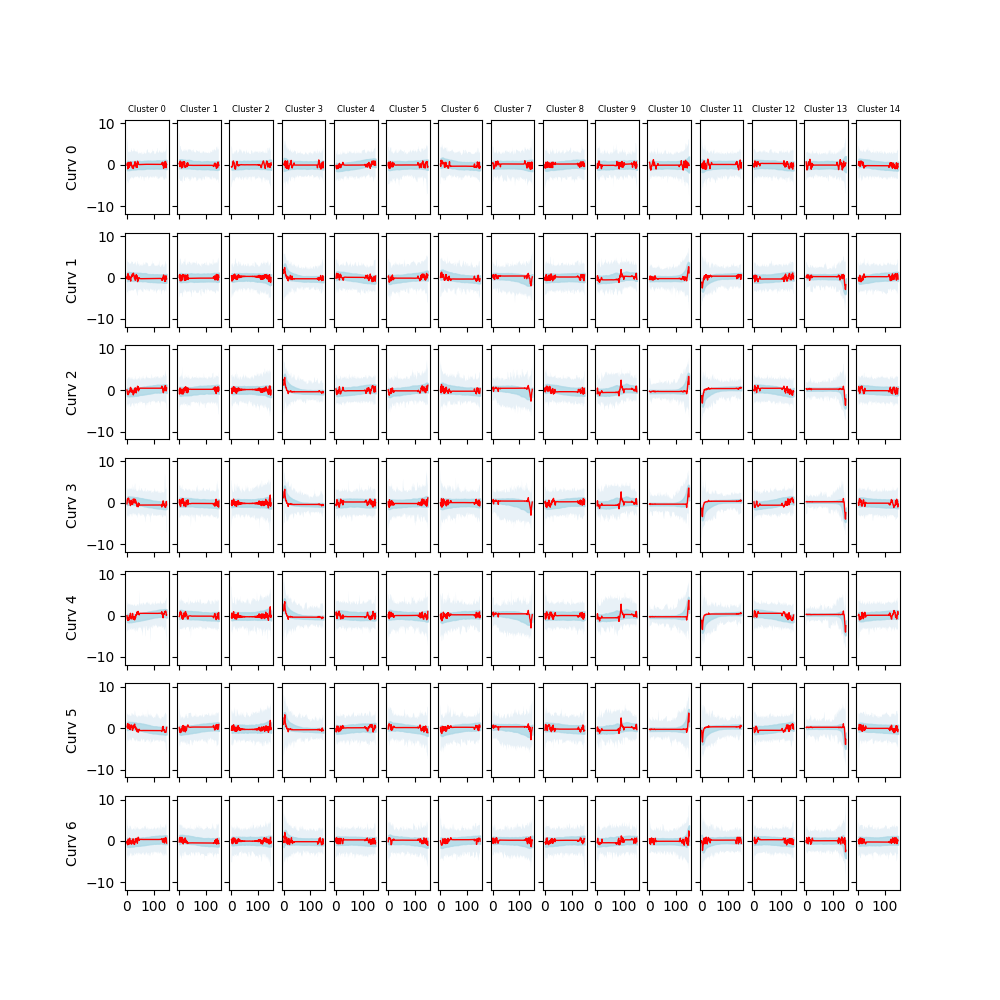

In [35]:
fig, ax = plt.subplots(7,n_clusters, figsize = (10, 10), sharex = True, sharey = True)
for cluster in range(n_clusters):
    subset = df[df["labels"] == cluster]
    
    subset_motifs = np.vstack(subset["scaled"].values)
#     minvals = np.min(subset_motifs, axis = 0)
#     maxvals = np.max(subset_motifs, axis = 0)
    
#     mean = np.median(subset_motifs, axis = 0)
#     std = np.median(subset_motifs, axis = 0)
    
    
    for j in range(7):
        
        sc = subset_motifs[:,:,j]
        minvals = np.min(sc, axis = 0)
        maxvals = np.max(sc, axis = 0)
        mean = np.mean(sc, axis = 0)
        sem = np.std(sc, axis = 0)
        up = mean+std
        down = mean-std
        ax[j, cluster].fill_between(np.arange(0,window,1), minvals, maxvals, alpha = 0.1)
        ax[j, cluster].fill_between(range(window), down, up, alpha = 0.8, color = "lightblue")
#         ax[j,cluster].axis("equal")
    
#     for i, s in tqdm.tqdm(subset.iterrows()):
#         for j in range(7):
#             ax[j, cluster].plot(s["scaled"][0,:,j], c = "gray", alpha = 0.008, lw  = 0.2)
#     #             ax[j,cluster].axis("equal")
    center = model.cluster_centers_[cluster]
    for j in range(7):
        ax[j,cluster].plot(center[:,j], c = "r", lw = 1)
        if j == 0:
            ax[j, cluster].set_title(f"Cluster {cluster}", fontsize = 6)
        if cluster == 0:
            ax[j, cluster].set_ylabel(f"Curv {j}")
        if j == 7:
            ax[j,cluster].set_xticklabels([0,15,30])
            
fig.savefig(f"cluster_centers_fillbetween_window{window}.svg")
fig.savefig(f"cluster_centers_fillbetween_window{window}.png")

In [ ]:
minvals

In [ ]:
maxvals

In [ ]:
minvals = np.min(np.vstack(subset_motifs), axis = 0)

In [ ]:
np.max(subset_motifs, axis = 0).shape

In [ ]:
fig.savefig("clustercenters_with_fillbetween.png")

In [ ]:
model.cluster_centers_[0].shape

In [ ]:
fig, ax = plt.subplots()
ax.fill_between(range(30), minvals, maxvals, alpha = 0.5)
ax.plot(model.cluster_centers_[1][:,1])